<a href="https://colab.research.google.com/github/Leosantos2910/Gerador-de-senha-/blob/main/Regress%C3%A3o_com_Consumo_de_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cenário 1: Regressão com Consumo de Energia
Objetivo: Prever o consumo de energia elétrica residencial utilizando técnicas de regressão.

AMSE: 0.2082181374194002


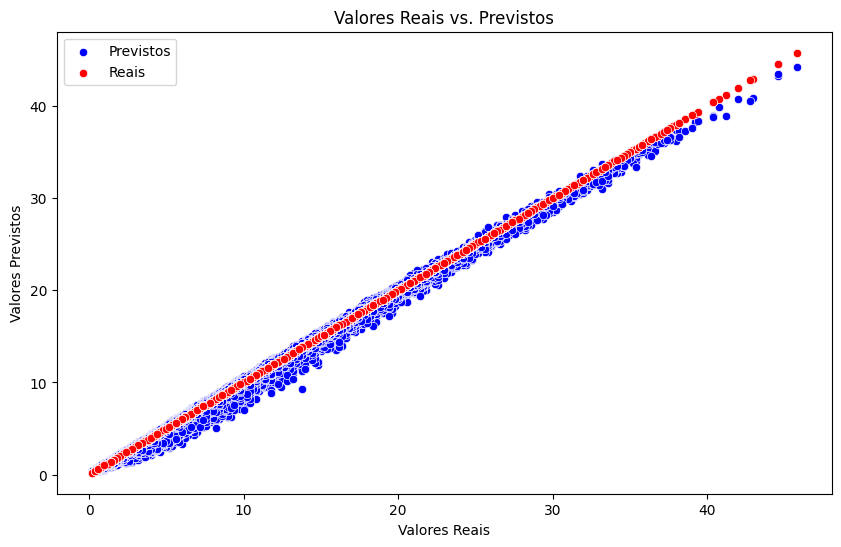

In [ ]:
from re import X
!pip install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?')
df.head()

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df = df.dropna()

X = df[['Global_active_power', 'Month', 'Hour']]
y = df['Global_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
print("AMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Previstos')
sns.scatterplot(x=y_test, y=y_test, color='red', label='Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.legend()
plt.show()